In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

# Description

A continuación, voy a aplicar el modelo RandomForest, primero SIN escalar y luego CON escalado (RobustScaler). 
Sin embargo, vamos a aplicar cambios significativos en el dataset de diamonds original: 
- Calcular el tamaño como la multiplicación de las columnas x, y, z.
- Eliminamos posteriormente estas columnas x, y, z.
- Agrupación de la columna de colores donde J es el peor y D es el mejor. 
- La columna de cut, en lugar de hacer un one hot encoding, haremos un label enconding donde 0 sea Fair y 4 sea Ideal. 
- Mantengo la clasificación de city por cotinent. 
- Mantengo la columna de depth aunque no aporte nada sobre price.
- Mantengo la clasificación de clarity en 4 columnas. 




In [2]:
diamonds = pd.read_csv('./data/diamonds.csv')

In [3]:
diamonds.head()

,price,carat,city,depth,table,x,y,z,cut,color,clarity
0,4268,1.21,Dubai,62.4,58.0,6.83,6.79,4.25,Premium,J,VS2
1,505,0.32,Kimberly,63.0,57.0,4.35,4.38,2.75,Very Good,H,VS2
2,2686,0.71,Las Vegas,65.5,55.0,5.62,5.53,3.65,Fair,G,VS1
3,738,0.41,Kimberly,63.8,56.0,4.68,4.72,3.00,Good,D,SI1
4,4882,1.02,Dubai,60.5,59.0,6.55,6.51,3.95,Ideal,G,SI1


In [4]:
diamonds["size"] = diamonds["x"] * diamonds["y"] * diamonds["z"]

In [5]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   city     40455 non-null  object 
 3   depth    40455 non-null  float64
 4   table    40455 non-null  float64
 5   x        40455 non-null  float64
 6   y        40455 non-null  float64
 7   z        40455 non-null  float64
 8   cut      40455 non-null  object 
 9   color    40455 non-null  object 
 10  clarity  40455 non-null  object 
 11  size     40455 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 3.7+ MB


In [6]:
diamonds = diamonds.drop('x', axis=1).drop('y', axis=1).drop('z', axis=1)

In [7]:
diamonds['cut'].value_counts()

cut
Ideal        16220
Premium      10260
Very Good     9095
Good          3663
Fair          1217
Name: count, dtype: int64

In [8]:
diamonds['cut'] = diamonds['cut'].map({'Fair': 0, 
                                       'Good': 1, 
                                       'Very Good': 2, 
                                       'Premium': 3, 
                                       'Ideal': 4})

In [9]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   city     40455 non-null  object 
 3   depth    40455 non-null  float64
 4   table    40455 non-null  float64
 5   cut      40455 non-null  int64  
 6   color    40455 non-null  object 
 7   clarity  40455 non-null  object 
 8   size     40455 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 2.8+ MB


In [10]:
diamonds['color'].value_counts()

color
G    8455
E    7325
F    7177
H    6277
D    5049
I    4032
J    2140
Name: count, dtype: int64

In [22]:
diamonds['color'] = diamonds['color'].map({'J': 0,
                                          'I': 1,
                                          'H': 2, 
                                          'G': 3,
                                          'F': 4, 
                                          'E': 5,
                                          'D': 6})


In [23]:
diamonds['continent'] = diamonds['city'].map({'Dubai': 'Asia',
                                                'Kimberly': 'Africa',
                                                'Las Vegas': 'America',
                                                'Tel Aviv': 'Asia',
                                                'Amsterdam': 'Europe',
                                                'Zurich': 'Europe',
                                                'Antwerp': 'Europe',
                                                'Madrid': 'Europe',
                                                'Paris': 'Europe',
                                                'Surat': 'Asia',
                                                'Luxembourg': 'Europe',
                                                'London': 'Europe',
                                                'New York City': 'America'})

In [24]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      40455 non-null  int64  
 1   carat      40455 non-null  float64
 2   city       40455 non-null  object 
 3   depth      40455 non-null  float64
 4   table      40455 non-null  float64
 5   x          40455 non-null  float64
 6   y          40455 non-null  float64
 7   z          40455 non-null  float64
 8   cut        40455 non-null  int64  
 9   color      40455 non-null  int64  
 10  clarity    40455 non-null  object 
 11  size       40455 non-null  float64
 12  continent  40455 non-null  object 
dtypes: float64(7), int64(3), object(3)
memory usage: 4.0+ MB


In [25]:
diamonds = diamonds.drop('city', axis=1)

In [27]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      40455 non-null  int64  
 1   carat      40455 non-null  float64
 2   depth      40455 non-null  float64
 3   table      40455 non-null  float64
 4   cut        40455 non-null  int64  
 5   color      40455 non-null  int64  
 6   clarity    40455 non-null  object 
 7   size       40455 non-null  float64
 8   continent  40455 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 2.8+ MB


In [31]:
diamonds['clarity'] = diamonds['clarity'].replace(['IF'], ['VVSI']).replace(['VVS1'], ['VVSI']).replace(['VVS2'], ['VVSI'])
# VVSI = Very Very Sligthly Included, incluye IF (Internally Flawless, VVS1 y VVS2 (Very, Very Slightly Included 1 y 2))

In [32]:
diamonds['clarity'] = diamonds['clarity'].replace(['VS1'], ['VSI']).replace(['VS2'], ['VSI'])
# VVS = Very Slightly Included, incluye Very Slightly Included 1 y 2 

In [33]:
diamonds['clarity'] = diamonds['clarity'].replace(['SI1'], ['SI']).replace(['SI2'], ['SI'])
# SI = Slightly Included, incluye Slightly Included 1 y 2 

In [34]:
diamonds['clarity'].value_counts()

clarity
SI      16678
VSI     15314
VVSI     7900
I1        563
Name: count, dtype: int64

In [35]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      40455 non-null  int64  
 1   carat      40455 non-null  float64
 2   depth      40455 non-null  float64
 3   table      40455 non-null  float64
 4   cut        40455 non-null  int64  
 5   color      40455 non-null  int64  
 6   clarity    40455 non-null  object 
 7   size       40455 non-null  float64
 8   continent  40455 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 2.8+ MB


## Collinearity

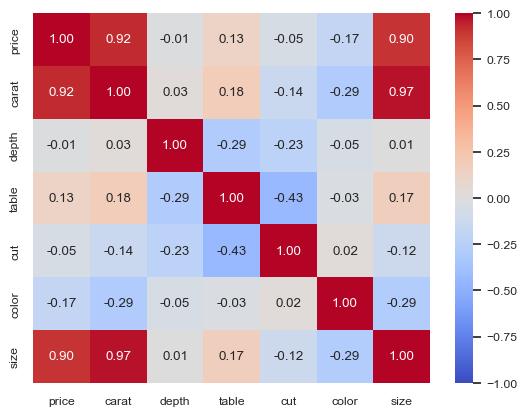

In [30]:
num_cols = diamonds.select_dtypes(include = ["int16", "int32", "int64", "float16", "float32", "float64"])

sns.set(font_scale=0.8)

sns.heatmap(num_cols.corr(), vmin=-1, vmax=+1, annot=True, cmap="coolwarm", fmt='.2f')
plt.show()

## One Hot Encoding

In [36]:
diamonds_dummy = pd.get_dummies(diamonds, drop_first=True, dtype=float)

In [37]:
diamonds_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              40455 non-null  int64  
 1   carat              40455 non-null  float64
 2   depth              40455 non-null  float64
 3   table              40455 non-null  float64
 4   cut                40455 non-null  int64  
 5   color              40455 non-null  int64  
 6   size               40455 non-null  float64
 7   clarity_SI         40455 non-null  float64
 8   clarity_VSI        40455 non-null  float64
 9   clarity_VVSI       40455 non-null  float64
 10  continent_America  40455 non-null  float64
 11  continent_Asia     40455 non-null  float64
 12  continent_Europe   40455 non-null  float64
dtypes: float64(10), int64(3)
memory usage: 4.0 MB


In [38]:
diamonds_dummy.head()

,price,carat,depth,table,cut,color,size,clarity_SI,clarity_VSI,clarity_VVSI,continent_America,continent_Asia,continent_Europe
0,4268,1.21,62.4,58.0,3,0,197.096725,0.0,1.0,0.0,0.0,1.0,0.0
1,505,0.32,63.0,57.0,2,2,52.395750,0.0,1.0,0.0,0.0,0.0,0.0
2,2686,0.71,65.5,55.0,0,3,113.436890,0.0,1.0,0.0,1.0,0.0,0.0
3,738,0.41,63.8,56.0,1,6,66.268800,1.0,0.0,0.0,0.0,0.0,0.0
4,4882,1.02,60.5,59.0,4,3,168.429975,1.0,0.0,0.0,0.0,1.0,0.0


In [39]:
diamonds_dummy.describe()

,price,carat,depth,table,cut,color,size,clarity_SI,clarity_VSI,clarity_VVSI,continent_America,continent_Asia,continent_Europe
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,3928.444469,0.797706,61.752841,57.446133,2.904783,3.400766,129.802259,0.412261,0.378544,0.195279,0.127846,0.250624,0.498529
std,3992.416147,0.475544,1.431725,2.233535,1.117876,1.701260,78.903997,0.492248,0.485030,0.396420,0.333922,0.433378,0.500004
min,326.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,945.000000,0.400000,61.000000,56.000000,2.000000,2.000000,64.889552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2397.000000,0.700000,61.800000,57.000000,3.000000,3.000000,114.689347,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5331.000000,1.040000,62.500000,59.000000,4.000000,5.000000,170.844547,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,18823.000000,4.500000,79.000000,95.000000,4.000000,6.000000,3840.598060,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## ⚠️⚠️ DECISION = SIN ESCALAR

In [40]:
X = diamonds_dummy.drop('price', axis=1)
y = diamonds_dummy['price']

In [41]:
print(X.shape)
print(y.shape)

(40455, 12)
(40455,)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
model = RandomForestRegressor()

In [46]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [56]:
predict_RF = model.predict(X_test)

In [59]:
predict_RF

array([2772.94      , 2325.85      ,  895.16666667, ..., 2674.99      ,
       3763.14      , 8358.13      ])

In [60]:
check_RF = pd.DataFrame({'Ground truth':y_test, 'Predictions':predict_RF, 'Diff':y_test-predict_RF})
check_RF

,Ground truth,Predictions,Diff
17775,2970,2772.940000,197.060000
13506,3004,2325.850000,678.150000
4325,838,895.166667,-57.166667
37870,6468,6841.000000,-373.000000
21321,633,613.030000,19.970000
...,...,...,...
3781,4764,4460.160000,303.840000
26959,756,619.305000,136.695000
15529,2690,2674.990000,15.010000
36333,3992,3763.140000,228.860000


In [61]:
# RMSE calculation

rmse_LR_robuts = mean_squared_error(y_test, predict_RF, squared=False)
rmse_LR_robuts

C:\Users\tete1\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


674.0570106539571

In [52]:
# Predice mucho mejor, el RMSE de RobustScaler con LinearRegresión fue de 1171

## ⚠️⚠️ DECISION = ROBUSTSCALER

In [54]:
print('Model:', model, '\n')

Model: RandomForestRegressor() 



In [62]:
robust_scaler = RobustScaler()
X_robust = robust_scaler.fit_transform(X)
X_robust

array([[ 0.796875  ,  0.4       ,  0.33333333, ...,  0.        ,
         1.        ,  0.        ],
       [-0.59375   ,  0.8       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.015625  ,  2.46666667, -0.66666667, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.484375  ,  0.6       , -0.33333333, ...,  0.        ,
         0.        ,  0.        ],
       [-0.578125  ,  0.06666667, -0.9       , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.84375   ,  0.13333333,  0.33333333, ...,  0.        ,
         0.        ,  1.        ]])

In [64]:
X_robust_train, X_robust_test, y_robust_train, y_robust_test = train_test_split(X_robust, y, test_size=0.2, random_state=42)

In [65]:
model.fit(X_robust_train, y_robust_train)

RandomForestRegressor()

In [66]:
predict_robust_RF = model.predict(X_robust_test)

In [68]:
check_RF = pd.DataFrame({'Ground truth':y_robust_test, 'Predictions':predict_robust_RF, 'Diff':y_robust_test-predict_robust_RF})
check_RF

,Ground truth,Predictions,Diff
17775,2970,2778.820000,191.180000
13506,3004,2322.010000,681.990000
4325,838,888.203333,-50.203333
37870,6468,6847.737500,-379.737500
21321,633,613.050000,19.950000
...,...,...,...
3781,4764,4523.150000,240.850000
26959,756,609.170000,146.830000
15529,2690,2768.020000,-78.020000
36333,3992,3727.920000,264.080000


In [69]:
check = pd.DataFrame({'Ground truth':y_test, 'Predictions robust':predict_robust_RF, 'Predictions NO Scaler':predict_RF, 'Diff robust':y_test-predict_robust_RF, 'Diff NO Scaler':y_test-predict_RF})
check

,Ground truth,Predictions robust,Predictions NO Scaler,Diff robust,Diff NO Scaler
17775,2970,2778.820000,2772.940000,191.180000,197.060000
13506,3004,2322.010000,2325.850000,681.990000,678.150000
4325,838,888.203333,895.166667,-50.203333,-57.166667
37870,6468,6847.737500,6841.000000,-379.737500,-373.000000
21321,633,613.050000,613.030000,19.950000,19.970000
...,...,...,...,...,...
3781,4764,4523.150000,4460.160000,240.850000,303.840000
26959,756,609.170000,619.305000,146.830000,136.695000
15529,2690,2768.020000,2674.990000,-78.020000,15.010000
36333,3992,3727.920000,3763.140000,264.080000,228.860000


In [70]:
# RMSE calculation

rmse_RF_robust = mean_squared_error(y_test, predict_robust_RF, squared=False)
rmse_RF_robust

C:\Users\tete1\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


670.5484495498238

In [71]:
# Es mejor el escalado

# Predict sobre diamonds_test

In [97]:
diamonds_test = pd.read_csv('./data/diamonds_test.csv')
diamonds_test

,id,carat,cut,color,clarity,depth,table,x,y,z,city
0,0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67,Amsterdam
1,1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18,Surat
2,2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57,Kimberly
3,3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90,Kimberly
4,4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19,Amsterdam
...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.57,Ideal,E,SI1,61.9,56.0,5.35,5.32,3.30,Amsterdam
13481,13481,0.71,Ideal,I,VS2,62.2,55.0,5.71,5.73,3.56,New York City
13482,13482,0.70,Ideal,F,VS1,61.6,55.0,5.75,5.71,3.53,Tel Aviv
13483,13483,0.70,Very Good,F,SI2,58.8,57.0,5.85,5.89,3.45,Surat


In [98]:
diamonds_test["size"] = diamonds_test["x"] * diamonds_test["y"] * diamonds_test["z"]

In [99]:
diamonds_test = diamonds_test.drop('x', axis=1).drop('y', axis=1).drop('z', axis=1)

In [100]:
diamonds_test['cut'] = diamonds_test['cut'].map({'Fair': 0, 
                                       'Good': 1, 
                                       'Very Good': 2, 
                                       'Premium': 3, 
                                       'Ideal': 4})

In [101]:
diamonds_test['color'] = diamonds_test['color'].map({'J': 0,
                                          'I': 1,
                                          'H': 2, 
                                          'G': 3,
                                          'F': 4, 
                                          'E': 5,
                                          'D': 6})

In [102]:
diamonds_test['continent'] = diamonds_test['city'].map({'Dubai': 'Asia',
                                                'Kimberly': 'Africa',
                                                'Las Vegas': 'America',
                                                'Tel Aviv': 'Asia',
                                                'Amsterdam': 'Europe',
                                                'Zurich': 'Europe',
                                                'Antwerp': 'Europe',
                                                'Madrid': 'Europe',
                                                'Paris': 'Europe',
                                                'Surat': 'Asia',
                                                'Luxembourg': 'Europe',
                                                'London': 'Europe',
                                                'New York City': 'America'})

In [103]:
diamonds_test = diamonds_test.drop('city', axis=1)

In [104]:
diamonds_test = diamonds_test.drop('id', axis=1)

In [105]:
diamonds_test['clarity'] = diamonds_test['clarity'].replace(['IF'], ['VVSI']).replace(['VVS1'], ['VVSI']).replace(['VVS2'], ['VVSI'])
diamonds_test['clarity'] = diamonds_test['clarity'].replace(['VS1'], ['VSI']).replace(['VS2'], ['VSI'])
diamonds_test['clarity'] = diamonds_test['clarity'].replace(['SI1'], ['SI']).replace(['SI2'], ['SI'])


In [106]:
diamonds_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      13485 non-null  float64
 1   cut        13485 non-null  int64  
 2   color      13485 non-null  int64  
 3   clarity    13485 non-null  object 
 4   depth      13485 non-null  float64
 5   table      13485 non-null  float64
 6   size       13485 non-null  float64
 7   continent  13485 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 842.9+ KB


In [107]:
diamonds_test_dummy = pd.get_dummies(diamonds_test, drop_first=True, dtype=float)

In [108]:
diamonds_test_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   carat              13485 non-null  float64
 1   cut                13485 non-null  int64  
 2   color              13485 non-null  int64  
 3   depth              13485 non-null  float64
 4   table              13485 non-null  float64
 5   size               13485 non-null  float64
 6   clarity_SI         13485 non-null  float64
 7   clarity_VSI        13485 non-null  float64
 8   clarity_VVSI       13485 non-null  float64
 9   continent_America  13485 non-null  float64
 10  continent_Asia     13485 non-null  float64
 11  continent_Europe   13485 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 1.2 MB


In [109]:
robust_scaler = RobustScaler()
X_diamonds_test_RB = robust_scaler.fit_transform(diamonds_test_dummy)
X_diamonds_test_RB

array([[ 0.140625  , -0.5       ,  0.33333333, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78125   ,  0.5       , -1.        , ...,  0.        ,
         1.        , -1.        ],
       [ 1.359375  ,  0.        , -0.33333333, ...,  0.        ,
         0.        , -1.        ],
       ...,
       [ 0.        ,  0.5       ,  0.33333333, ...,  0.        ,
         1.        , -1.        ],
       [ 0.        , -0.5       ,  0.33333333, ...,  0.        ,
         1.        , -1.        ],
       [-0.46875   ,  0.5       , -0.66666667, ...,  1.        ,
         0.        , -1.        ]])

In [110]:
predict_test_RB_RF = model.predict(X_diamonds_test_RB)

In [112]:
predict_test_RB_RF.shape

(13485,)

In [114]:
pred_df_RB_RF = pd.DataFrame(predict_test_RB_RF, columns=['price'])

In [115]:
pred_df_RB_RF['id'] = range(0, len(pred_df_RB_RF))

In [117]:
pred_df_RB_RF = pred_df_RB_RF[['id', 'price']]

In [118]:
pred_df_RB_RF.to_csv('./submissions/submission_pred_RB_RF.csv', index=False)